## Поиск экстремумов функций

 - $\mathbb{X}$ — пространство объектов
 - $\mathbb{Y}$ — пространство ответов
 - $x = (x^1, ..., x^d)$ — признаковое описнаие объектов
 - $X = (x_i, y_i)_{i=1}^l$ — выборка
 - $a(x)$ — алгоритм
 - $Q(a, X)$ — функционал качества алгоритма $a$ на выборке $X$
 - Обучение: $a(x) = argmin_{a \in A} Q(a, X)$

### Линейная регрессия

Задача регресии: $\mathbb{Y} = \mathbb{R}$

Линейная модель: $a(x) = \langle w, x\rangle$

Функционал качества: $Q(a, x) = \sum_{i=1}^l(a(x_i) - y_i)^2$

Обучение: $\sum_{i=1}^l(\langle w, x_i\rangle - y_i)^2 \to min_{w}$

#### Мат. анализ

Как находить минимум? Лемма Ферма: производная дифференцируемой функции в точке локального экстремума равна нулю.

Что такое дифференцируемая функция? Необходимым, но не достаточным условием дифференцируемости является непрерывность функции (малые изменения аргумента приводят к малым изменениям функции). 

Для функции многих переменных: если точка $x_0$ — экстремум, и в ней существует градиент, то $\nabla{f(x_0)} = 0$

#### Обратно к линейной регрессии

Получается, что можно найти точное решение:

$w = (X^TX)^{-1}X^Ty$

Но если функция более сложная, либо мы не знаем как было полученно точное решение, воспользуемся методами численной оптимизации, а именно:

 - выберем начальный вектор весов
 - будем улучшать вектор весов, двигаться в сторону антиградиента $Q$: $w^t = w^{t-1} -\eta\nabla{Q(w^{t-1})}$, где $\eta$ — размер шага

Когда остановиться?
 - $\lVert w^t - w^{t-1} \rVert < \varepsilon$
 - ограничиваем количество итераций

## Пример

Пусть задана функция $f(x, y) = x^2 + y^2$

Хотим найти ее минимум с помощью градиентного спуска. 

Тогда нужны частные производные:

$\frac{\partial f}{\partial x} = 2x$

$\frac{\partial f}{\partial y} = 2y$

Минимум очевиден — (0, 0)

In [1]:
import numpy as np
%pylab inline 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Populating the interactive namespace from numpy and matplotlib


In [13]:
def gradient_descent_2(step, ans, iters=100):
    x_points = [ans[0]]
    y_points = [ans[1]]
    
    for i in xrange(iters):
        if i % 10 == 0:
            print("iter %s | %.7f" % (i, function(ans[0], ans[1])))
        new_ans = ans - step * f_grad(*ans)
        if np.linalg.norm(ans - new_ans, 2) < 1e-05:
            break
        
        ans = new_ans
        x_points.append(ans[0])
        y_points.append(ans[1])
    print "i:", i, "function:", function(*ans), "answer:", ans
    plt.plot(x_points, y_points, linestyle='-', marker = '^', markersize=8, color='magenta')
    plt.plot(x_points[0], y_points[0], linestyle='-', marker = 'o', markersize=10, color='blue')
    plt.show()
    return ans

def visualize(step, init, iters=100):
    fig, ax = plt.subplots(1,1, sharey=True, figsize = (10, 10))
    cs = ax.contour(x, y, z)
    plt.clabel(cs, inline=2, fontsize=10)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    gradient_descent_2(step, np.array(init))

In [8]:
def function(x, y):
    return x**2 + y**2 

def f_grad(x, y):
    return np.array([2 * x, 2 * y])

def make_data(function):
    x = np.linspace(-2, 2, 1000)
    y = np.linspace(-2, 2, 1000)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid = function(xgrid, ygrid)
    return xgrid, ygrid, zgrid

In [9]:
x, y, z = make_data(function)

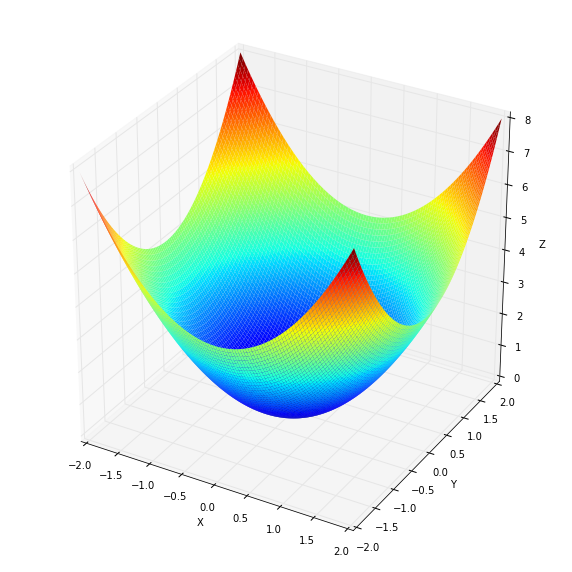

In [10]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, 
                cmap=cm.jet, rstride=10, cstride=10, linewidth=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

iter 0 | 3.2500000
iter 10 | 0.0374699
iter 20 | 0.0004320
iter 30 | 0.0000050
iter 40 | 0.0000001
i: 48 function: 1.61630051833e-09 answer: [ -2.23007452e-05   3.34511178e-05]


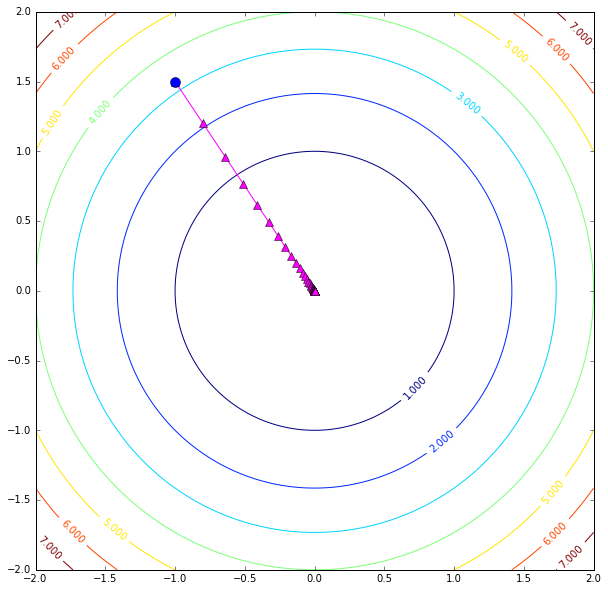

In [11]:
visualize(0.1, [-1, 1.5])

И градиентный спуск его нашел. Но всегда ли? Попробуем поварьировать шаг.

iter 0 | 3.2500000
iter 10 | 3.2500000
iter 20 | 3.2500000
iter 30 | 3.2500000
iter 40 | 3.2500000
iter 50 | 3.2500000
iter 60 | 3.2500000
iter 70 | 3.2500000
iter 80 | 3.2500000
iter 90 | 3.2500000
i: 99 function: 3.25 answer: [-1.   1.5]


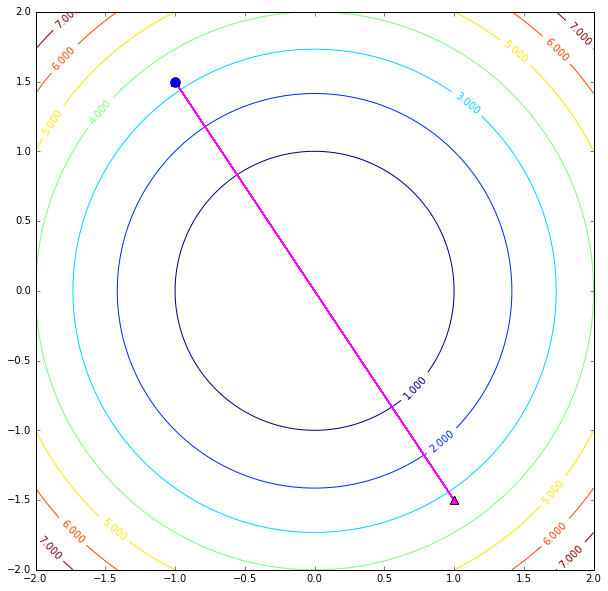

In [17]:
visualize(1, [-1, 1.5])

Что произошло? Слишком большой шаг.



Но что если взять менее очевидную функцию? Например $f(x, y) = sin(1/2x^2 - 1/4y^2 + 3)cos(2x + 1 - exp(y))$

In [19]:
def function(x, y):
    return sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2 * x + 1 - exp(y))

def f_grad(x, y):
    return np.array([cos(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2 * x + 1 - exp(y)) * x - 
                     sin(1/2 * x**2 - 1/4 * y**2 + 3) * sin(2 * x + 1 - exp(y)) * 2, 
                     cos(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2 * x + 1 - exp(y)) * (-1 / 2 * y) - 
                     sin(1/2 * x**2 - 1/4 * y**2 + 3) * sin(2 * x + 1 - exp(y)) * (-exp(y))])

def make_data(function):
    x = np.linspace(-2, 2, 500)
    y = np.linspace(-2, 2, 500)
    xgrid, ygrid = np.meshgrid(x, y)
    zgrid = function(xgrid, ygrid)
    return xgrid, ygrid, zgrid

In [20]:
x, y, z = make_data(function)

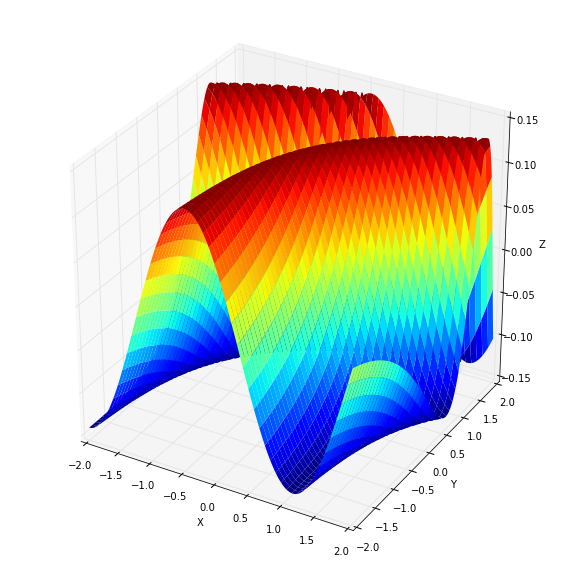

In [21]:
fig = plt.figure(figsize = (10, 10))
ax = fig.gca(projection='3d')
ax.plot_surface(x, y, z, 
                cmap=cm.jet, rstride=10, cstride=10, linewidth=0)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [22]:
def visualize(step, init, iters=100):
    fig, ax = plt.subplots(1,1, sharey=True, figsize = (10, 10))
    cs = ax.contour(x, y, z)
    plt.clabel(cs, inline=2, fontsize=10)
    ax.set_xlim([-2, 2])
    ax.set_ylim([-2, 2])
    gradient_descent_2(step, np.array(init), iters)

iter 0 | 0.0762475
iter 10 | -0.0349086
iter 20 | -0.0699553
iter 30 | -0.1377290
iter 40 | -0.0664711
iter 50 | -0.0638941
iter 60 | -0.0630180
iter 70 | -0.0626562
iter 80 | -0.0624891
iter 90 | -0.0624051
i: 99 function: -0.0623600721477 answer: [ 0.52954719  1.84273369]


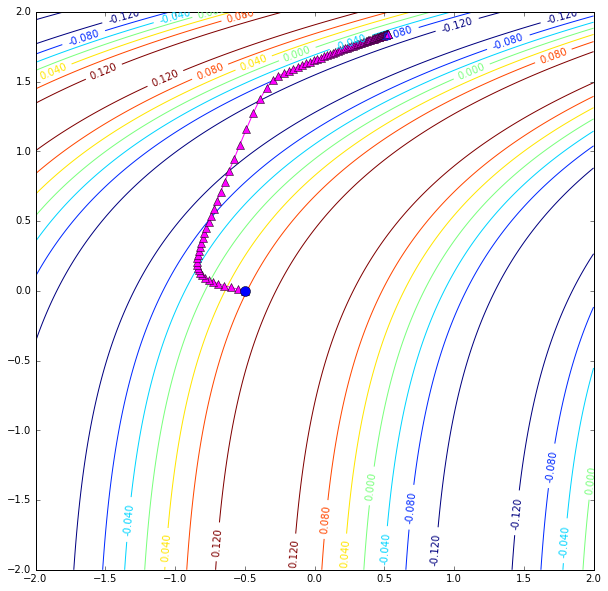

In [23]:
visualize(0.1, [-0.5, 0])

А теперь был слишком маленький шаг и не хватило итераций.

iter 0 | -0.0992952
iter 10 | -0.0468423
iter 20 | -0.0654754
iter 30 | -0.0667440
iter 40 | -0.0667008
iter 50 | -0.0667008
iter 60 | -0.0667008
iter 70 | -0.0667008
iter 80 | -0.0667008
iter 90 | -0.0667008
i: 99 function: -0.0667008435498 answer: [  5.31547786e-01  -2.53943273e+07]


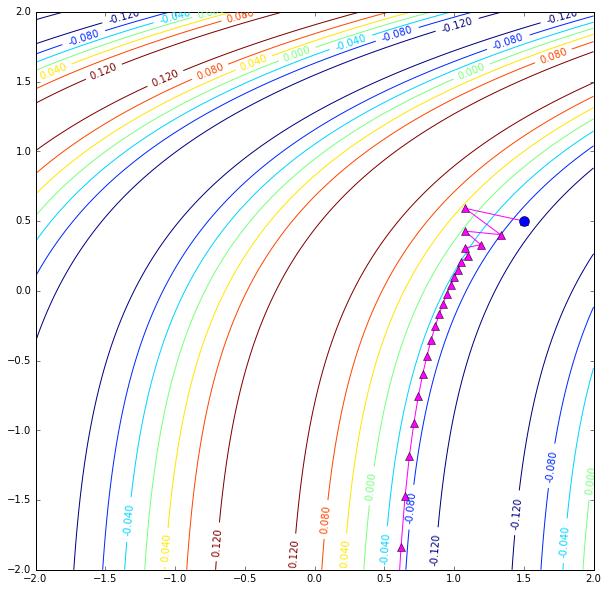

In [29]:
visualize(0.5, [1.5, 0.5], 100)

Нужно обращать внимание на

* Начальное приближение
* Попадание в локальные минимумы
* Критерий останова
* Выбор шага.

![](https://s-media-cache-ak0.pinimg.com/236x/2b/1e/30/2b1e30aaf2a8432aec2cf9b2f4be2bc4.jpg)